# Load the data

In [45]:
import pandas as pd

In [46]:
# load data and convert to datetime
df = pd.read_csv('log.txt', names=['date', 'time', 'val'], parse_dates=[['date', 'time']])
df.head()

,date_time,val
0,08.12 10:30:04,529
1,08.12 10:30:04,537
2,08.12 10:30:05,530
3,08.12 10:30:06,532
4,08.12 10:30:06,530


In [47]:
# convert to datetime
df['date_time'] = pd.to_datetime(df['date_time'], format='%d.%m %H:%M:%S', errors='coerce')
df.dropna(inplace=True)
df.head()

,date_time,val
0,1900-12-08 10:30:04,529
1,1900-12-08 10:30:04,537
2,1900-12-08 10:30:05,530
3,1900-12-08 10:30:06,532
4,1900-12-08 10:30:06,530


<AxesSubplot: xlabel='date_time'>

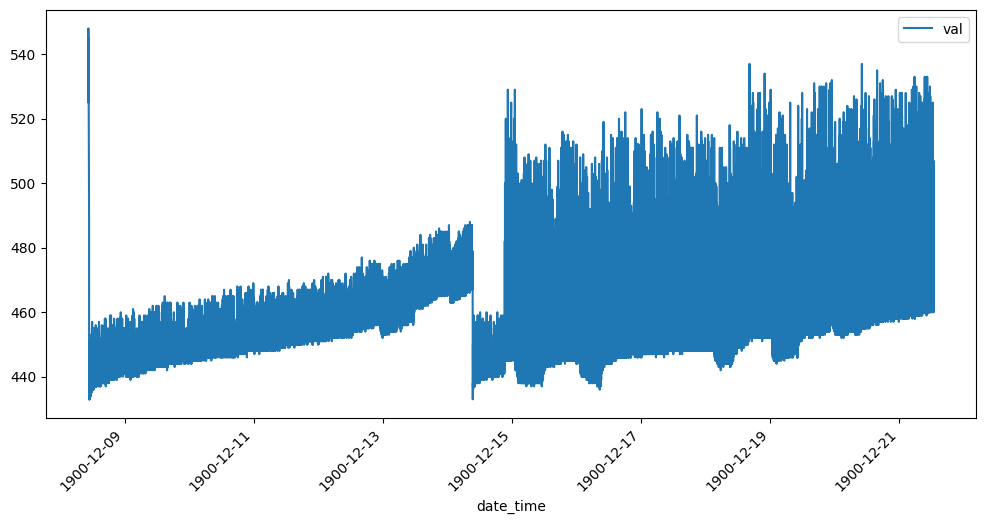

In [48]:
df.plot(x='date_time', y='val', rot=45, figsize=(12, 6))

# Create preprocessing functions

In [49]:
# outlier removal
from sktime.transformations.series.outlier_detection import HampelFilter

def remove_outliers(dataframe, column='val', sigma=2.5):
    dataframe[column] = HampelFilter(n_sigma=sigma).fit_transform(dataframe[column].values)
    dataframe.dropna(inplace=True)
    return dataframe

In [50]:
# noise reduction
def noise_reduction(dataframe, column='val', window_size=50):
    dataframe[column] = dataframe[column].rolling(window_size).mean()
    dataframe.dropna(inplace=True)
    return dataframe

# check on first timeseries

<AxesSubplot: xlabel='date_time'>

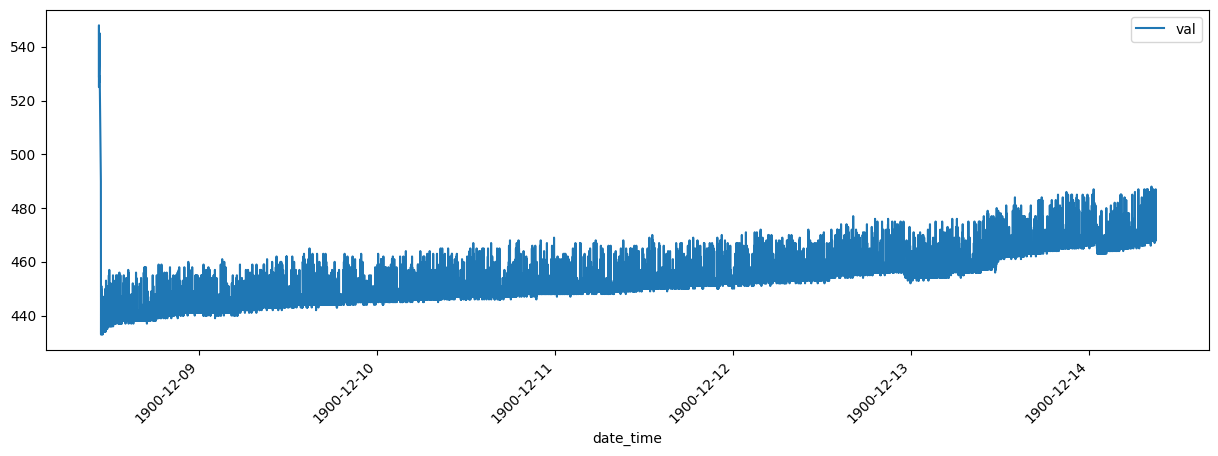

In [51]:
# separate first experiment
ex1 = df.loc[:17100]
ex1.plot(x='date_time', y='val', rot=45, figsize=(15,5))

<AxesSubplot: xlabel='date_time'>

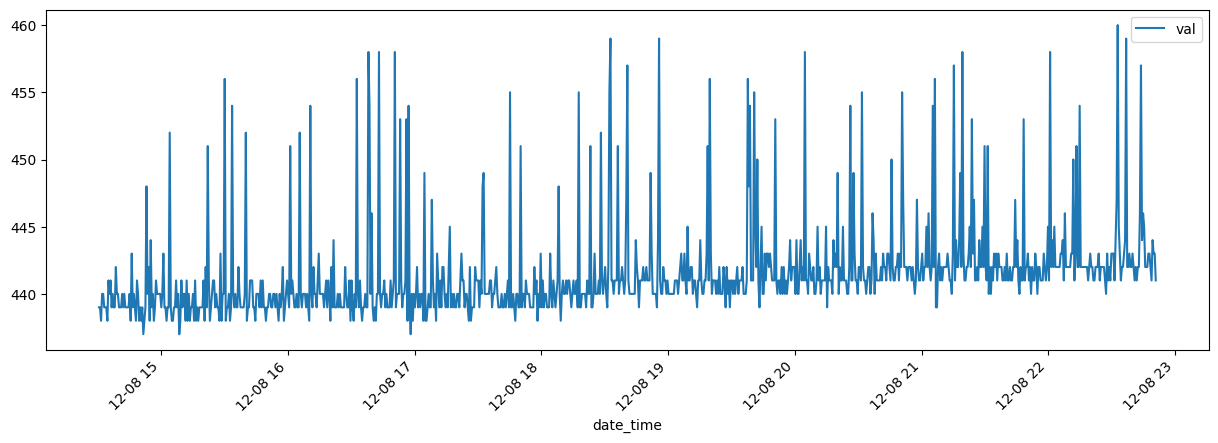

In [52]:
# plot part of the timeseries
ex1.loc[500:1500].plot(x='date_time', y='val', rot=45, figsize=(15,5))

<AxesSubplot: xlabel='date_time'>

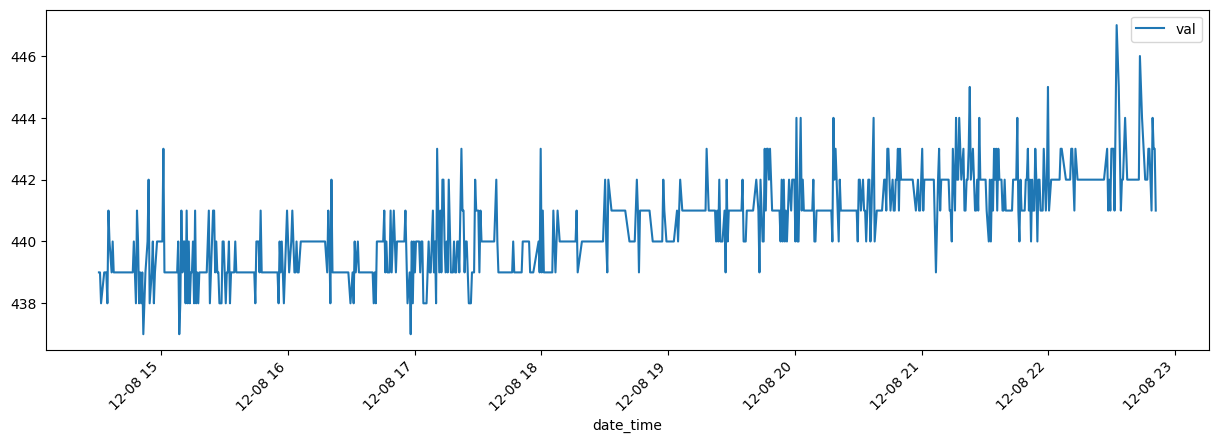

In [53]:
ex1_pre = ex1.copy(deep=True)
ex1_pre = remove_outliers(ex1_pre)
ex1_pre.loc[500:1500].plot(x='date_time', y='val', rot=45, figsize=(15,5))

<AxesSubplot: xlabel='date_time'>

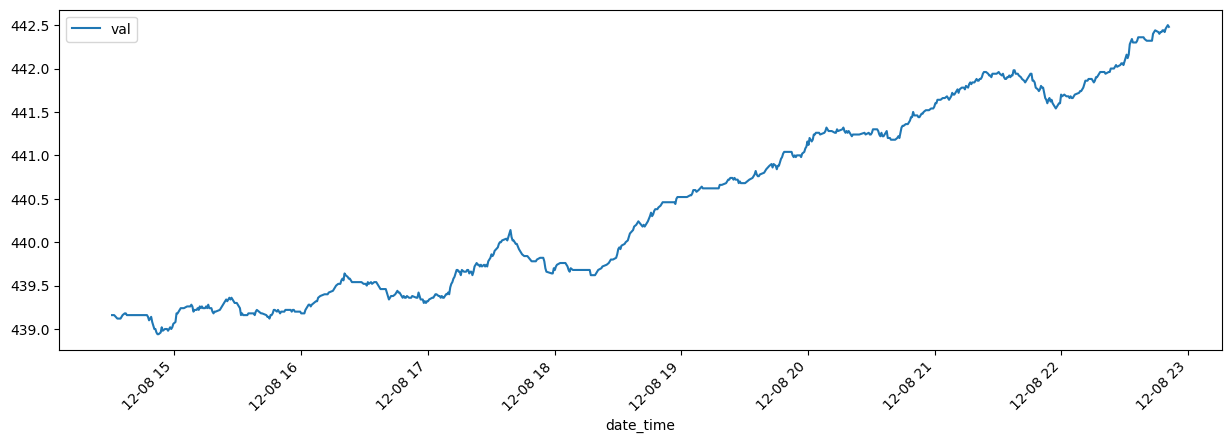

In [54]:
ex1_pre = noise_reduction(ex1_pre)
ex1_pre.loc[500:1500].plot(x='date_time', y='val', rot=45, figsize=(15,5))

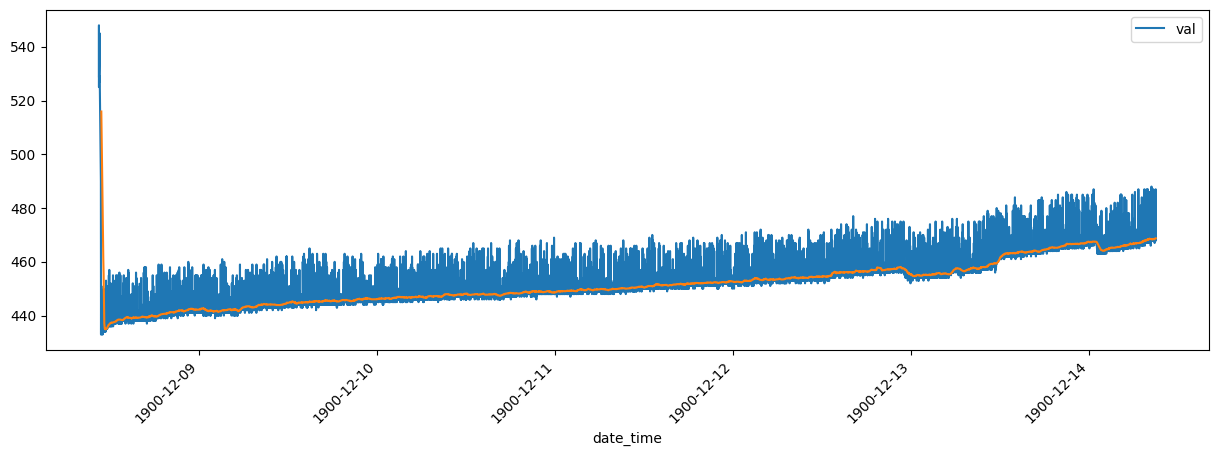

In [57]:
import matplotlib.pyplot as plt
ex1.plot(x='date_time', y='val', rot=45, figsize=(15,5))
plt.plot(ex1_pre['date_time'], ex1_pre['val'])

# rest of data

<AxesSubplot: xlabel='date_time'>

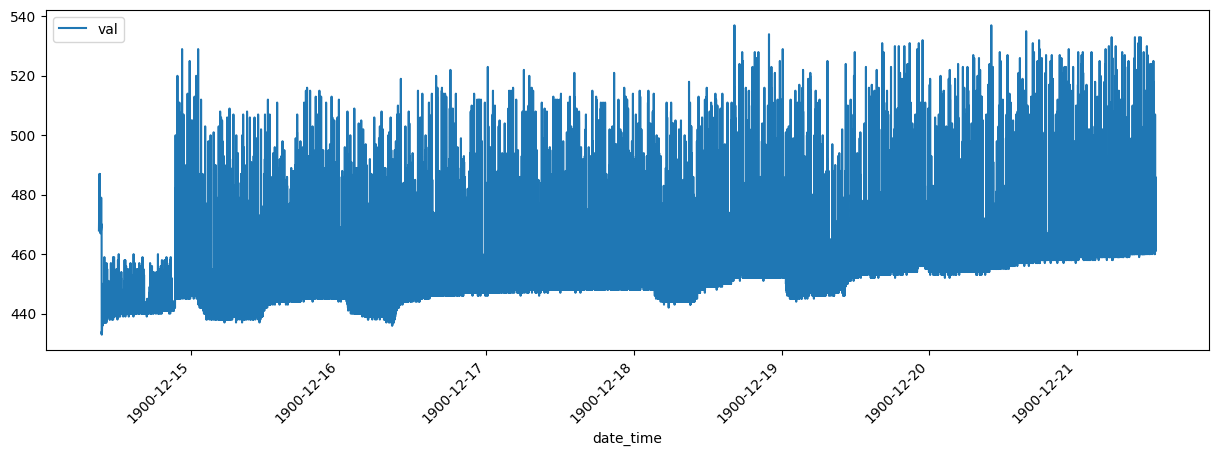

In [61]:
ex2 = df.loc[17100:]
ex2.plot(x='date_time', y='val', rot=45, figsize=(15,5))

<AxesSubplot: xlabel='date_time'>

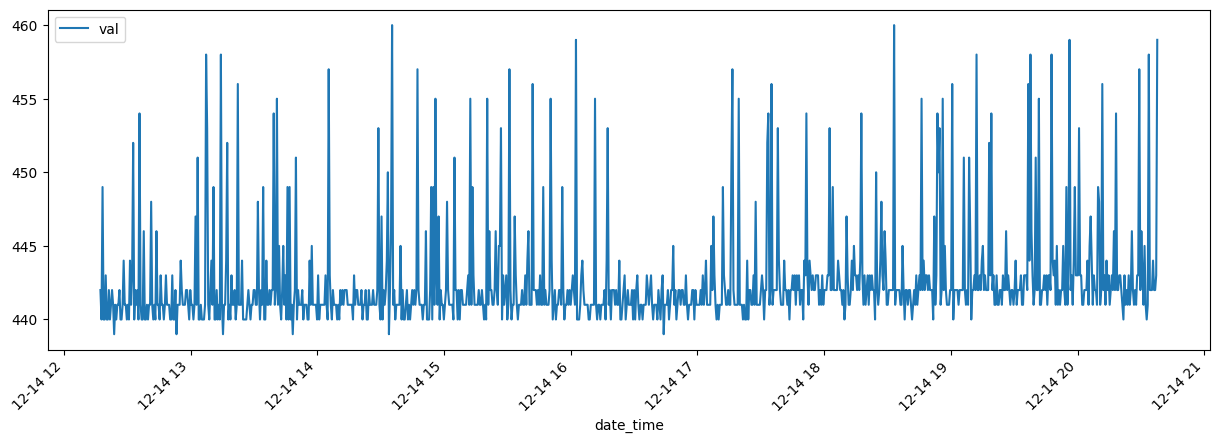

In [62]:
ex2.loc[17500:18500].plot(x='date_time', y='val', rot=45, figsize=(15,5))

<AxesSubplot: xlabel='date_time'>

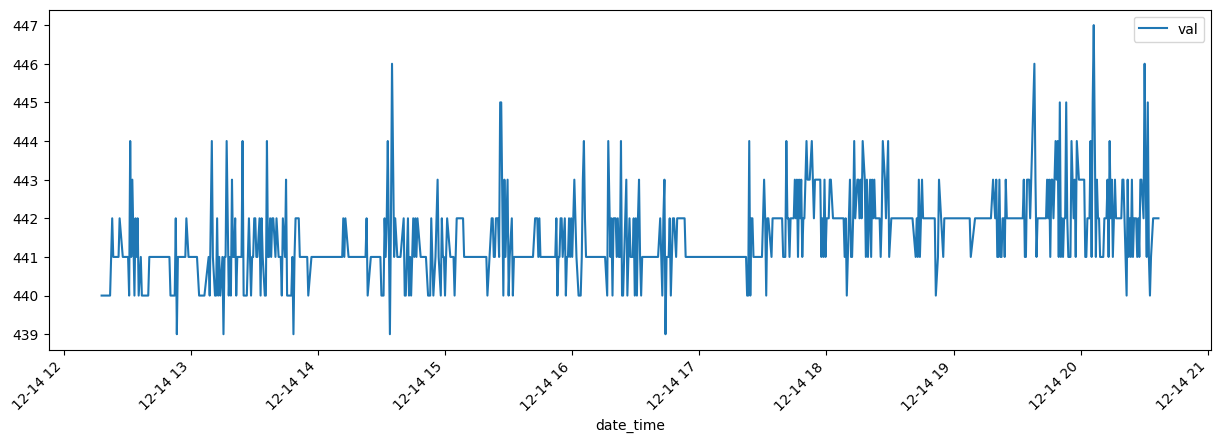

In [64]:
ex2_pre = ex2.copy(deep=True)
ex2_pre = remove_outliers(ex2_pre)
ex2_pre.loc[17500:18500].plot(x='date_time', y='val', rot=45, figsize=(15,5))

<AxesSubplot: xlabel='date_time'>

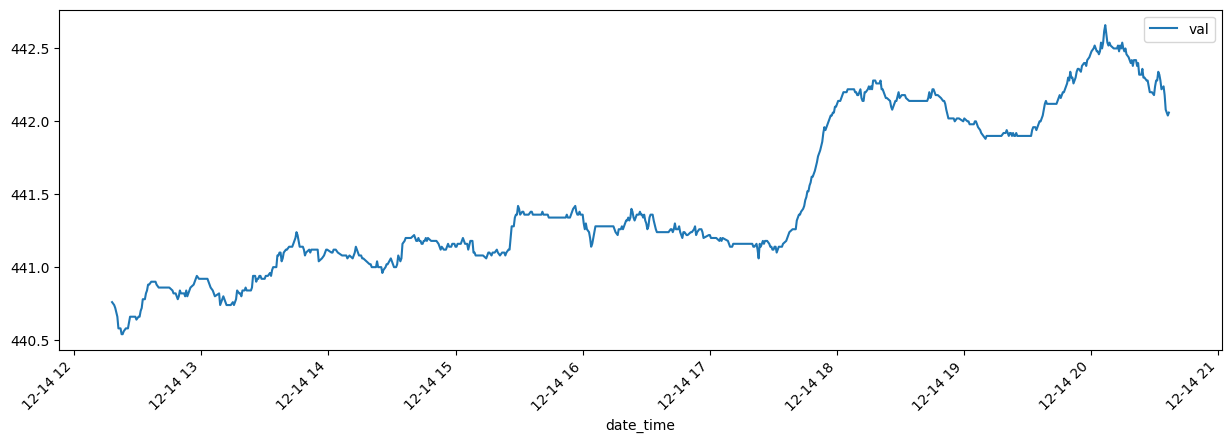

In [65]:
ex2_pre = noise_reduction(ex2_pre)
ex2_pre.loc[17500:18500].plot(x='date_time', y='val', rot=45, figsize=(15,5))

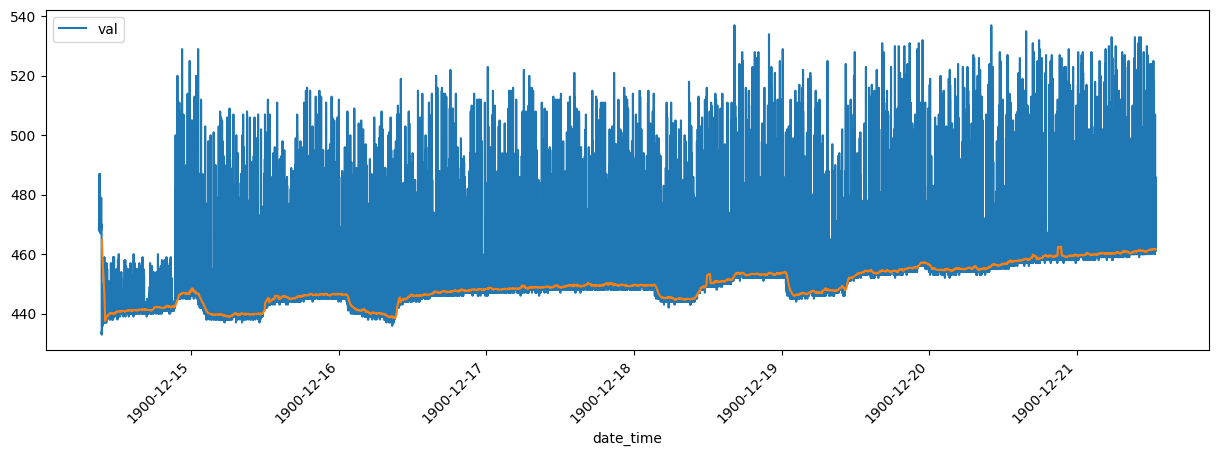

In [66]:
import matplotlib.pyplot as plt
ex2.plot(x='date_time', y='val', rot=45, figsize=(15,5))
plt.plot(ex2_pre['date_time'], ex2_pre['val'])